In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [123]:
# Load the data into pandas DataFrame
hf = pd.read_csv('police.csv') 
hf.head()

,raw_row_number,date,time,location,lat,lng,district,subject_age,subject_race,subject_sex,...,outcome,contraband_found,search_conducted,search_vehicle,search_basis,reason_for_stop,raw_subject_race_code,raw_subject_ethnicity_code,raw_search_authorization_code,raw_intervention_disposition_code
0,1,2013-10-13,15:21:00,LINNMORE ST AT ROGER,41.732189,-72.699760,SOUTH WEST,38.0,hispanic,female,...,citation,NaN,False,False,NaN,Stop Sign,W,H,N,I
1,2,2013-10-24,01:12:00,HAWTHORN STREET @ IMLAY STREET,41.764621,-72.695362,ASYLUM HILL,20.0,black,male,...,citation,NaN,False,False,NaN,Defective Lights,B,N,N,I
2,3,2013-10-26,10:06:00,NEW PARK MIRRILL,41.747837,-72.712933,PARKVILLE,26.0,white,female,...,citation,NaN,False,False,NaN,Traffic Control Signal,W,N,N,I
3,4,2013-10-26,18:06:00,nfew park at merrill st,41.748069,-72.712641,PARKVILLE,26.0,white,female,...,citation,NaN,False,False,NaN,Traffic Control Signal,W,N,N,I
4,5,2013-10-26,19:56:00,SUMMIT ST AT ZION ST,41.753945,-72.693278,FROG HOLLOW,39.0,white,male,...,citation,NaN,False,False,NaN,Stop Sign,W,N,N,I


In [124]:
print(hf.shape)
hf.isna().sum()

(18439, 26)


raw_row_number                           0
date                                     4
time                                     4
location                                 0
lat                                    210
lng                                    210
district                              1231
subject_age                              4
subject_race                             0
subject_sex                              0
officer_id_hash                          0
department_name                          0
type                                     0
arrest_made                              5
citation_issued                          0
warning_issued                           0
outcome                               2522
contraband_found                     13254
search_conducted                         0
search_vehicle                           2
search_basis                         13255
reason_for_stop                          0
raw_subject_race_code                    0
raw_subject

## 1-Cleaning and verification of the data

In [125]:
# Dropping lat and lng cause location values exist and all columns starting with raw
hf.drop(['raw_row_number', 'lat','lng','raw_subject_race_code','raw_subject_ethnicity_code','raw_search_authorization_code','raw_intervention_disposition_code'], axis='columns', inplace=True)

In [126]:
hf.head(10)

,date,time,location,district,subject_age,subject_race,subject_sex,officer_id_hash,department_name,type,arrest_made,citation_issued,warning_issued,outcome,contraband_found,search_conducted,search_vehicle,search_basis,reason_for_stop
0,2013-10-13,15:21:00,LINNMORE ST AT ROGER,SOUTH WEST,38.0,hispanic,female,9623b482ee,Hartford,vehicular,False,True,False,citation,NaN,False,False,NaN,Stop Sign
1,2013-10-24,01:12:00,HAWTHORN STREET @ IMLAY STREET,ASYLUM HILL,20.0,black,male,616e63d3fb,Hartford,vehicular,False,True,False,citation,NaN,False,False,NaN,Defective Lights
2,2013-10-26,10:06:00,NEW PARK MIRRILL,PARKVILLE,26.0,white,female,9623b482ee,Hartford,vehicular,False,True,False,citation,NaN,False,False,NaN,Traffic Control Signal
3,2013-10-26,18:06:00,nfew park at merrill st,PARKVILLE,26.0,white,female,5ac7b58482,Hartford,vehicular,False,True,False,citation,NaN,False,False,NaN,Traffic Control Signal
4,2013-10-26,19:56:00,SUMMIT ST AT ZION ST,FROG HOLLOW,39.0,white,male,9623b482ee,Hartford,vehicular,False,True,False,citation,NaN,False,False,NaN,Stop Sign
5,2013-10-26,21:57:00,LAUREL ST AT CAPITOL AV,ASYLUM HILL,51.0,hispanic,male,9623b482ee,Hartford,vehicular,False,True,False,citation,NaN,False,False,NaN,Traffic Control Signal
6,2013-10-26,22:08:00,RUSS ST AT PUTNAM S T,FROG HOLLOW,34.0,white,male,9623b482ee,Hartford,vehicular,False,True,False,citation,NaN,False,False,NaN,Stop Sign
7,2013-10-29,13:18:00,FLATBUSH AV AT HILLSIDE,BEHIND THE ROCKS,24.0,hispanic,male,9623b482ee,Hartford,vehicular,False,True,False,citation,NaN,False,False,NaN,Moving Violation
8,2013-10-29,13:50:00,HUDSON ST @ JEFFERSON,SOUTH GREEN,37.0,white,female,172bfdfefb,Hartford,vehicular,False,True,False,citation,NaN,False,False,NaN,Cell Phone
9,2013-10-30,11:57:00,BROAD AT MADISON,FROG HOLLOW,42.0,black,female,9623b482ee,Hartford,vehicular,False,True,False,citation,NaN,False,False,NaN,Stop Sign


In [127]:
# getting rid of the 4 missing values for date and time along with the 4 missing subject_age
hf.dropna(subset=['date','time','subject_age'], inplace=True)

In [128]:
# display shape 
print(hf.shape)
hf['contraband_found'].unique()

(18431, 19)


array([nan, False, True], dtype=object)

In [129]:
# checking and setting types of the attributes
print(hf.info())
#Store the columns to convert and the appropriate type in dict
type_cols={'arrest_made':bool,'search_vehicle':bool,'contraband_found':bool,'subject_age':int}
hf=hf.astype(type_cols)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18431 entries, 0 to 18438
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              18431 non-null  object 
 1   time              18431 non-null  object 
 2   location          18431 non-null  object 
 3   district          17200 non-null  object 
 4   subject_age       18431 non-null  float64
 5   subject_race      18431 non-null  object 
 6   subject_sex       18431 non-null  object 
 7   officer_id_hash   18431 non-null  object 
 8   department_name   18431 non-null  object 
 9   type              18431 non-null  object 
 10  arrest_made       18426 non-null  object 
 11  citation_issued   18431 non-null  bool   
 12  warning_issued    18431 non-null  bool   
 13  outcome           15910 non-null  object 
 14  contraband_found  5183 non-null   object 
 15  search_conducted  18431 non-null  bool   
 16  search_vehicle    18429 non-null  object

In [130]:
hf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18431 entries, 0 to 18438
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   date              18431 non-null  object
 1   time              18431 non-null  object
 2   location          18431 non-null  object
 3   district          17200 non-null  object
 4   subject_age       18431 non-null  int32 
 5   subject_race      18431 non-null  object
 6   subject_sex       18431 non-null  object
 7   officer_id_hash   18431 non-null  object
 8   department_name   18431 non-null  object
 9   type              18431 non-null  object
 10  arrest_made       18431 non-null  bool  
 11  citation_issued   18431 non-null  bool  
 12  warning_issued    18431 non-null  bool  
 13  outcome           15910 non-null  object
 14  contraband_found  18431 non-null  bool  
 15  search_conducted  18431 non-null  bool  
 16  search_vehicle    18431 non-null  bool  
 17  search_basis

In [131]:
#Combine date and time into one col and converting it to datetime
combined=hf.date.str.cat(hf.time,sep=' ')
hf['stop_datetime'] = pd.to_datetime(combined)
#Setting the new column as index
hf.set_index('stop_datetime', inplace=True)

In [132]:
hf.drop(['date','time'],axis='columns',inplace=True)
hf.head(9)

,location,district,subject_age,subject_race,subject_sex,officer_id_hash,department_name,type,arrest_made,citation_issued,warning_issued,outcome,contraband_found,search_conducted,search_vehicle,search_basis,reason_for_stop
stop_datetime,,,,,,,,,,,,,,,,,
2013-10-13 15:21:00,LINNMORE ST AT ROGER,SOUTH WEST,38,hispanic,female,9623b482ee,Hartford,vehicular,False,True,False,citation,True,False,False,NaN,Stop Sign
2013-10-24 01:12:00,HAWTHORN STREET @ IMLAY STREET,ASYLUM HILL,20,black,male,616e63d3fb,Hartford,vehicular,False,True,False,citation,True,False,False,NaN,Defective Lights
2013-10-26 10:06:00,NEW PARK MIRRILL,PARKVILLE,26,white,female,9623b482ee,Hartford,vehicular,False,True,False,citation,True,False,False,NaN,Traffic Control Signal
2013-10-26 18:06:00,nfew park at merrill st,PARKVILLE,26,white,female,5ac7b58482,Hartford,vehicular,False,True,False,citation,True,False,False,NaN,Traffic Control Signal
2013-10-26 19:56:00,SUMMIT ST AT ZION ST,FROG HOLLOW,39,white,male,9623b482ee,Hartford,vehicular,False,True,False,citation,True,False,False,NaN,Stop Sign
2013-10-26 21:57:00,LAUREL ST AT CAPITOL AV,ASYLUM HILL,51,hispanic,male,9623b482ee,Hartford,vehicular,False,True,False,citation,True,False,False,NaN,Traffic Control Signal
2013-10-26 22:08:00,RUSS ST AT PUTNAM S T,FROG HOLLOW,34,white,male,9623b482ee,Hartford,vehicular,False,True,False,citation,True,False,False,NaN,Stop Sign
2013-10-29 13:18:00,FLATBUSH AV AT HILLSIDE,BEHIND THE ROCKS,24,hispanic,male,9623b482ee,Hartford,vehicular,False,True,False,citation,True,False,False,NaN,Moving Violation
2013-10-29 13:50:00,HUDSON ST @ JEFFERSON,SOUTH GREEN,37,white,female,172bfdfefb,Hartford,vehicular,False,True,False,citation,True,False,False,NaN,Cell Phone


## 2- Exploring relationships 


In [133]:
hf['reason_for_stop'].value_counts()

Cell Phone                              3768
Speed Related                           3533
Other                                   2018
Stop Sign                               1963
Traffic Control Signal                  1895
Moving Violation                         994
Display of Plates                        861
Registration                             739
Suspended License                        660
Defective Lights                         558
Seatbelt                                 552
Window Tint                              518
Administrative Offense                   151
STC Violation                            121
Equipment Violation                       68
Unlicensed Operation                      23
Other|Moving Violation                     2
Traffic Control Signal|Cell Phone          1
Other|Display of Plates                    1
Registration|Suspended License             1
Traffic Control Signal|Speed Related       1
Display of Plates|Window Tint              1
Other|Stop

In [134]:
hf['outcome'].value_counts(normalize=True)

citation    0.738655
warning     0.216593
arrest      0.044752
Name: outcome, dtype: float64

### Comparing violations by gender

In [135]:
# Create a DataFrame of female drivers
female = hf[hf.subject_sex=='female']

# Create a DataFrame of male drivers
male = hf[hf.subject_sex=='male']

# Compute the violations by female drivers (as proportions)
print(female['reason_for_stop'].value_counts(normalize=True))

# Compute the violations by male drivers (as proportions)
print(male['reason_for_stop'].value_counts(normalize=True))

Cell Phone                           0.249073
Speed Related                        0.221255
Stop Sign                            0.100571
Traffic Control Signal               0.094864
Other                                0.092582
Suspended License                    0.043937
Registration                         0.042653
Moving Violation                     0.040514
Display of Plates                    0.029387
Defective Lights                     0.027389
Window Tint                          0.022111
Seatbelt                             0.019544
STC Violation                        0.007418
Administrative Offense               0.005849
Equipment Violation                  0.001427
Unlicensed Operation                 0.000999
Traffic Control Signal|Cell Phone    0.000143
Registration|Suspended License       0.000143
Administrative Offense|Cell Phone    0.000143
Name: reason_for_stop, dtype: float64
Cell Phone                              0.177042
Speed Related                          

In [136]:
# Calculate the search rate by taking the mean
print(hf.search_conducted.mean())

hf.groupby(['subject_sex','outcome']).search_conducted.mean()

0.281373772448592


subject_sex  outcome 
female       arrest      0.688119
             citation    0.268369
             warning     0.229079
male         arrest      0.584314
             citation    0.253389
             warning     0.248343
Name: search_conducted, dtype: float64

In [137]:
hf['cell_phone'] = hf.reason_for_stop.str.contains('Cell Phone', na=False)
hf.cell_phone.sum()

3770

In [138]:
# Create a DataFrame of stops in which a search was conducted
searched = hf[hf.search_conducted == True]

# Calculate the overall cell phone rate by taking the mean of 'cell_phone'
print(searched.cell_phone.mean())

# Calculate the cell phone rate for each gender
print(searched.groupby('subject_sex').cell_phone.mean())

0.1710374084072503
subject_sex
female    0.211664
male      0.145762
Name: cell_phone, dtype: float64


In [139]:
# Calculating the overall arrest rate
print(hf.arrest_made.mean())

# Calculating the hourly arrest rate
print(hf.groupby(hf.index.hour).arrest_made.mean())

# Saving the hourly arrest rate to visualise it 
hourly_arrest_rate = hf.groupby(hf.index.hour).arrest_made.mean()

0.038901850143779504
stop_datetime
0     0.055215
1     0.059524
2     0.057692
3     0.076923
4     0.043478
5     0.071429
6     0.000000
7     0.004751
8     0.013194
9     0.017699
10    0.033689
11    0.037096
12    0.043529
13    0.036558
14    0.051308
15    0.032184
16    0.031048
17    0.037555
18    0.061286
19    0.075342
20    0.094926
21    0.065728
22    0.064639
23    0.072626
Name: arrest_made, dtype: float64


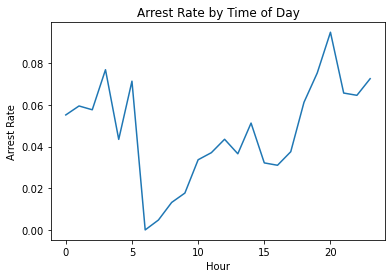

In [140]:
# Creating a line plot of 'hourly_arrest_rate'
hourly_arrest_rate.plot()

# Adding the xlabel, ylabel, and title
plt.xlabel('Hour')
plt.ylabel('Arrest Rate')
plt.title('Arrest Rate by Time of Day')

# Displaying the plot
plt.show()

The arrest rate has a significant spike overnight, and then dips in the early morning hours.

In [141]:
hf.contraband_found.value_counts()

True     13329
False     5102
Name: contraband_found, dtype: int64

Text(0.5, 1.0, 'Contraband Rate by Time of Day')

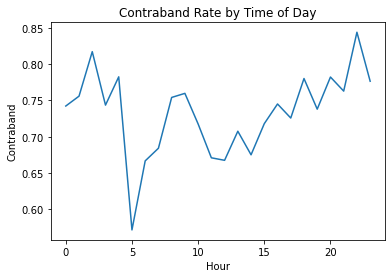

In [142]:
contraband=hf.groupby(hf.index.hour).contraband_found.mean()

# Creating a line plot of 'contraband'
contraband.plot()

# Setting title,xlabel and ylabel
plt.xlabel('Hour')
plt.ylabel('Contraband')
plt.title('Contraband Rate by Time of Day')

<AxesSubplot:xlabel='subject_race', ylabel='contraband_found'>

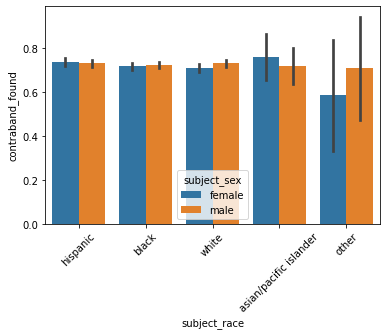

In [143]:
plt.xticks(rotation=45)
sns.barplot(x='subject_race',y='contraband_found',data=hf,hue='subject_sex')

<AxesSubplot:xlabel='AgeRange', ylabel='contraband_found'>

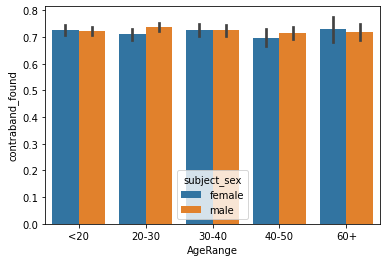

In [144]:
bins = [20,30,40,50,60,np.inf]
names = ['<20','20-30','30-40','40-50','60+']

hf['AgeRange']=pd.cut(hf['subject_age'],bins,labels=names)
sns.barplot(x='AgeRange',y='contraband_found',data=hf,hue='subject_sex')

<AxesSubplot:xlabel='district'>

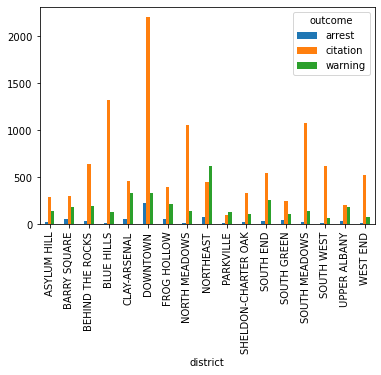

In [145]:
all_zones = pd.crosstab(hf.district,hf.outcome)
all_zones.plot(kind='bar')